In [1]:
import torch
import numpy as np
from model import Model
from plotter import Plotter
from backup_manager import BackupManager
from predictions import Predictions

In [2]:
model = BackupManager.load_model_basic(directory="models/training_5")

Model loaded from models/training_5/epoch_327.pkl


Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/hep/nrc25/miniconda3/envs/mlhep/lib/python3.12/site-packages/eos/signal_pdf.py:71: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  log_proposal = pypmc.density.gauss.LocalGauss(sigma)


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

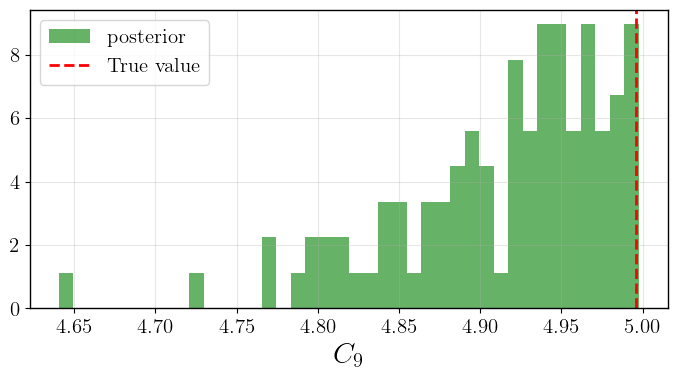

In [3]:
n_sampled_parameters = 100
n_points = 1000
true_parameter, observed_sample, sampled_parameters = model.get_true_parameters_simulations_and_sampled_parameters(n_true=1, n_points=n_points, n_sampled_parameters=n_sampled_parameters)
Plotter.plot_a_posterior(sampled_parameters, true_parameter)

In [4]:
estimator, uncertainty = Predictions.calculate_estimator(sampled_parameters)
print(f"Estimator {estimator.item()}, uncertainty {uncertainty.item()}")

Estimator 4.913952827453613, uncertainty 0.06372499465942383


In [5]:
mean, median, q5, q16, q84, q95, std, width_68 = Predictions.calculate_estimator_summary(sampled_parameters)
print("Mean", mean.item())
print("Median", median.item())
print("q5", q5.item())
print("q16", q16.item())
print("q84", q84.item())
print("q95", q95.item())
print("std", std.item())
print("width_68", width_68.item())

Mean 4.913952827453613
Median 4.931375503540039
q5 4.792003631591797
q16 4.849856853485107
q84 4.977306842803955
q95 4.993083477020264
std 0.06719936430454254
width_68 0.12744998931884766


In [6]:
prior_samples = model.draw_parameters_from_prior(n_sampled_parameters) # normalized and formated

In [7]:
log_contraction = Predictions.log_contraction(prior_samples, sampled_parameters).item()
print("Log contraction", log_contraction)

Log contraction 2.3525195121765137


In [8]:
information_gain = Predictions.information_gain(prior_samples, sampled_parameters).item()
print("Information gain", information_gain)

Information gain 1.9713233709335327


In [9]:
n_true = 2
true_parameters, observed_samples, many_sampled_parameters = model.get_true_parameters_simulations_and_sampled_parameters(n_true=n_true, n_points=n_points, n_sampled_parameters=n_sampled_parameters)

Simulating samples:   0%|          | 0/2 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Drawing 100 samples for 2 observations:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
estimator, uncertainty = Predictions.calculate_estimator(many_sampled_parameters)
print(f"Estimator {estimator}, uncertainty {uncertainty}")

Estimator tensor([4.7539, 3.9984]), uncertainty tensor([0.1280, 0.1046])


In [11]:
mean, median, q5, q16, q84, q95, std, width_68 = Predictions.calculate_estimator_summary(many_sampled_parameters)
print("Mean", mean)
print("Median", median)
print("q5", q5)
print("q16", q16)
print("q84", q84)
print("q95", q95)
print("std", std)
print("width_68", width_68)

Mean tensor([4.7539, 3.9984])
Median tensor([4.7886, 3.9905])
q5 tensor([4.5477, 3.8147])
q16 tensor([4.6244, 3.9049])
q84 tensor([4.8803, 4.1140])
q95 tensor([4.9319, 4.1587])
std tensor([0.1316, 0.1053])
width_68 tensor([0.2559, 0.2092])


In [12]:
log_contraction = Predictions.log_contraction(prior_samples, many_sampled_parameters)
print("Log contraction", log_contraction)

Log contraction tensor([1.6554, 1.8572])


In [13]:
information_gain = Predictions.information_gain(prior_samples, many_sampled_parameters)
print("Information gain", information_gain)

Information gain tensor([1.1741, 1.2907])


In [14]:
average_uncertainty = Predictions.average_uncertainty(many_sampled_parameters)
print("Average uncertainty", average_uncertainty)

Average uncertainty 0.11626535654067993
